In [ ]:
import kagglehub

path = kagglehub.dataset_download("saurabh00007/iriscsv")

print("Path to dataset files:", path)

100%|██████████| 1.28k/1.28k [00:00<00:00, 2.31MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/saurabh00007/iriscsv/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv(path +'/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
print("Dataset Information")
df.info()

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
print("Descriptive Statistics")
df.describe()

Descriptive Statistics


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
print("Class Distribution")
df['Species'].value_counts()

Class Distribution


,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


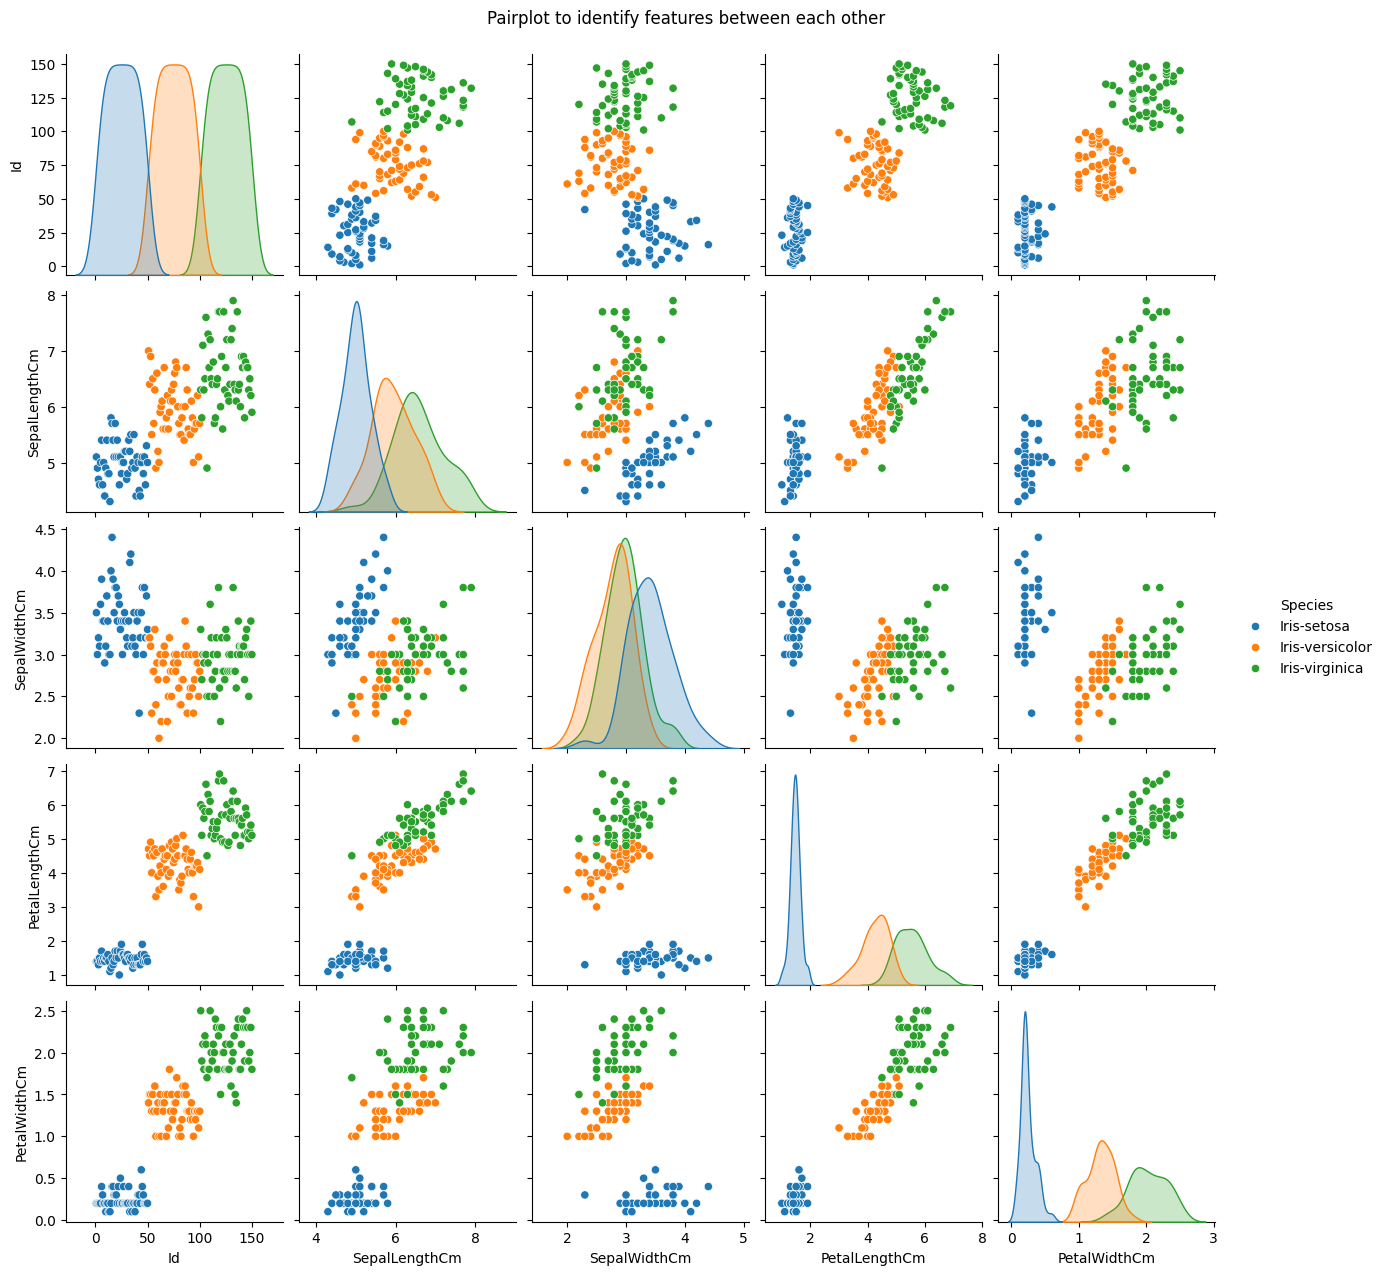

In [ ]:
sns.pairplot(df, hue = 'Species')
plt.suptitle("Pairplot to identify features between each other", y = 1.02)
plt.show()

In [ ]:
x = df.drop(['Id','Species'], axis = 1)
y = df['Species']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size = 0.2, random_state = 42)

In [ ]:
model = RandomForestClassifier(random_state = 42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", round(acc*100,2),"%")

Accuracy Score: 100.0 %


In [ ]:
print("Classification Report")
print("Classfication Report:\n", classification_report(y_test, y_pred, target_names = le.classes_))

Classification Report
Classfication Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



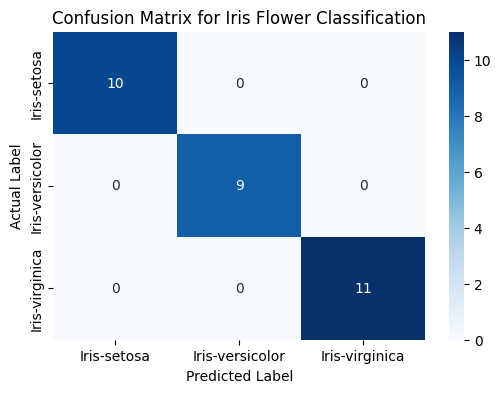

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = le.classes_, yticklabels = le.classes_)
plt.title("Confusion Matrix for Iris Flower Classification")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [ ]:
inp = np.array([[5.1, 5.3, 2.0, 2.8]])
predic = model.predict(inp)
in_pred = le.inverse_transform(predic)
print("Prediction", in_pred[0])

Prediction Iris-setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
